# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [76]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [78]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2184 - val_acc: 0.9406
Epoch 2/20
 - 3s - loss: 0.1911 - acc: 0.9455 - val_loss: 0.1558 - val_acc: 0.9558
Epoch 3/20
 - 3s - loss: 0.1356 - acc: 0.9617 - val_loss: 0.1260 - val_acc: 0.9652
Epoch 4/20
 - 3s - loss: 0.1027 - acc: 0.9702 - val_loss: 0.1122 - val_acc: 0.9683
Epoch 5/20
 - 3s - loss: 0.0811 - acc: 0.9774 - val_loss: 0.0982 - val_acc: 0.9719
Epoch 6/20
 - 2s - loss: 0.0660 - acc: 0.9820 - val_loss: 0.0934 - val_acc: 0.9719
Epoch 7/20
 - 2s - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0913 - val_acc: 0.9740
Epoch 8/20
 - 2s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0829 - val_acc: 0.9760
Epoch 9/20
 - 2s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0821 - val_acc: 0.9759
Epoch 10/20
 - 2s - loss: 0.0316 - acc: 0.9916 - val_loss: 0.0801 - val_acc: 0.9769
Epoch 11/20
 - 2s - loss: 0.0260 - acc: 0.9940 - val_loss: 0.0788 - val_acc: 0.9760
Epoch 12/20
 - 2s - loss: 0.0217 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

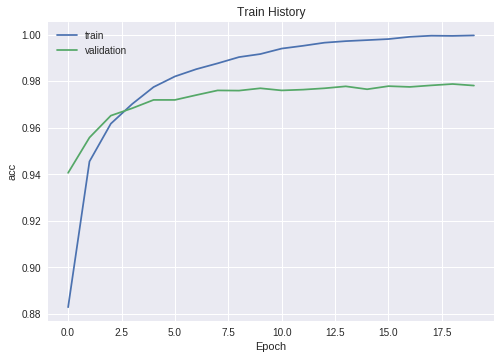

In [80]:
show_train_history(train_history,'acc','val_acc')

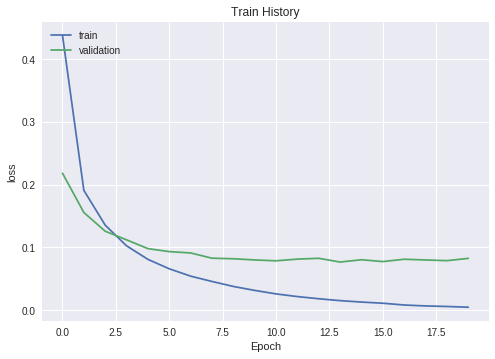

In [81]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [82]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9784


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [84]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

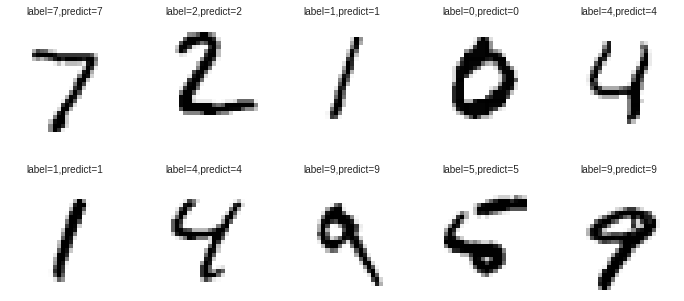

In [86]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [87]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,1,1,0,3,1,3,0
1,0,1126,4,0,0,1,2,1,1,0
2,5,0,1011,0,0,0,2,8,5,1
3,0,0,5,985,0,3,0,7,3,7
4,2,1,3,1,953,0,3,4,1,14
5,2,0,0,12,1,863,4,3,4,3
6,5,2,3,1,3,3,941,0,0,0
7,0,2,6,2,0,0,0,1016,1,1
8,4,1,9,7,3,4,3,9,931,3


In [88]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [89]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


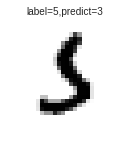

In [90]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

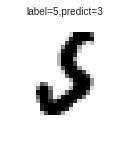

In [91]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)

In [96]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [97]:
!ls "/content/drive/My Drive/"

 10530014	    HX.emu0	        SKMBT_36316053109190_0007.jpg
 3D動畫製作.docx   'RaidCall (1).apk'   海報.gdoc
 696.png	   'RaidCall (2).apk'
'Colab Notebooks'   RaidCall.apk


In [98]:
cd  "/content/drive/My Drive/Colab Notebooks/"


/content/drive/My Drive/Colab Notebooks


In [99]:
!ls

 2			      Keras_Mnist_CNN.ipynb
 696.png		     'Keras_Mnist_Introduce (1).ipynb'
 7.png			     'Keras_Mnist_Introduce (2).ipynb'
'image (1).ipynb'	      Keras_Mnist_Introduce.ipynb
 Keras_Imdb_Introduce.ipynb   Keras_Mnist_MLP_h256.ipynb


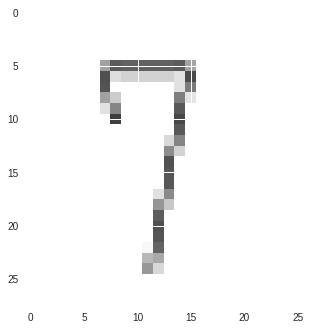

In [100]:
# plot image
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread('7.png') # 画像の読み込み

plt.imshow(img)
plt.show()

In [101]:
img.dtype

dtype('float32')

In [102]:
img.shape

(28, 28, 3)

In [0]:
imggray=img[:,:,0]

In [105]:
imggray.shape

(28, 28)

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [108]:
x_train_image.shape

(60000, 28, 28)

In [0]:
testimg=x_train_image[0,:,:]

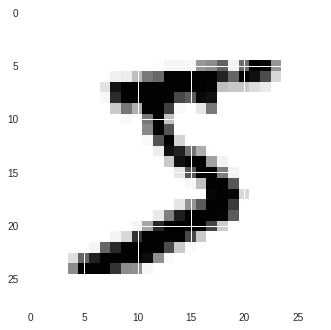

In [111]:
plt.imshow(testimg)

plt.show()

In [0]:
from PIL import Image
# Convert array to Image 
imabiarry = Image.fromarray(testimg)
imabiarry.save('bin2result.png')

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [120]:
y_train_label.shape

(60000,)

In [122]:
y_Train_OneHot.shape

(60000, 10)

In [124]:
y_Train_OneHot[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

建立模型 Buliding Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [129]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


建立模型 Training Model

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [135]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.0041 - acc: 0.9998 - val_loss: 0.0832 - val_acc: 0.9771
Epoch 2/20
 - 2s - loss: 0.0032 - acc: 0.9999 - val_loss: 0.0813 - val_acc: 0.9786
Epoch 3/20
 - 2s - loss: 0.0027 - acc: 0.9999 - val_loss: 0.0816 - val_acc: 0.9794
Epoch 4/20
 - 2s - loss: 0.0024 - acc: 0.9999 - val_loss: 0.0840 - val_acc: 0.9789
Epoch 5/20
 - 2s - loss: 0.0021 - acc: 0.9999 - val_loss: 0.0863 - val_acc: 0.9789
Epoch 6/20
 - 2s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 0.9779
Epoch 7/20
 - 2s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0879 - val_acc: 0.9796
Epoch 8/20
 - 2s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0870 - val_acc: 0.9793
Epoch 9/20
 - 2s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0898 - val_acc: 0.9784
Epoch 10/20
 - 2s - loss: 8.1701e-04 - acc: 1.0000 - val_loss: 0.0916 - val_acc: 0.9785
Epoch 11/20
 - 2s - loss: 7.1939e-04 - acc: 1.0000 - val_loss: 0.0898 - val_acc: 0.9789
Epoch 12/20
 - 2s - loss: 6

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

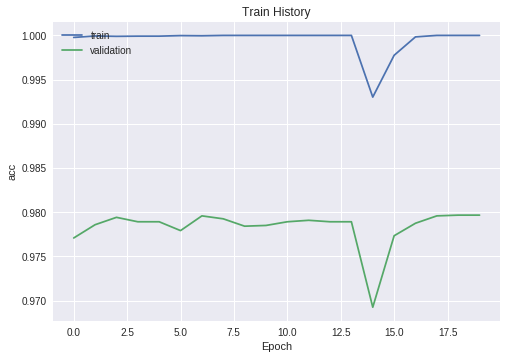

In [137]:
show_train_history(train_history,'acc','val_acc')

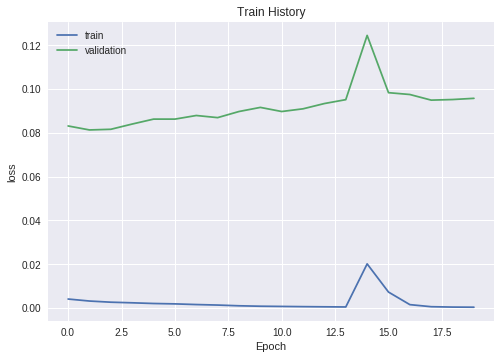

In [138]:
show_train_history(train_history,'loss','val_loss')

In [139]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9805


In [140]:
x_Test_normalize.shape

(10000, 784)

In [141]:
y_Test_OneHot.shape

(10000, 10)

In [0]:
import numpy as np
myimg_onehot=np.array([0.,0.,1.,0.,0.,0.,0.,0.,0.,0.])
img_onehot=myimg_onehot.astype('float32')

In [143]:
img_onehot.dtype

dtype('float32')